<h3> Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In /home/vedangp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/vedangp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/vedangp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
#Loading the data into a pandas dataframe
data = pd.read_csv('machine-learning-ex1/ex1/ex1data1.txt', header = None)
X = data.iloc[:,0]    # Read the first column into X
y = data.iloc[:,1]    # Read the second column into y
m = len(y)

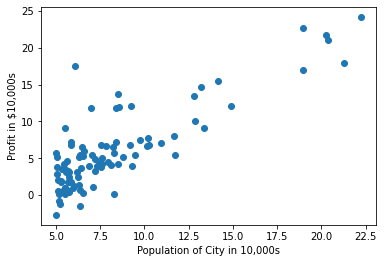

In [3]:
plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [4]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding the intercept term

In [5]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [9]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y               # Difference between predicted value and actual value
    return np.sum(np.power(temp, 2)) / (2*m)  # Mean Sum of squares for all data

J = costFunction(X, y, theta)
print(J)

4.483388256587726


In [10]:
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta

theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.87805118]
 [ 1.1912525 ]]


In [11]:
J = computeCost(X, y, theta)
print(J)

4.47699999352146


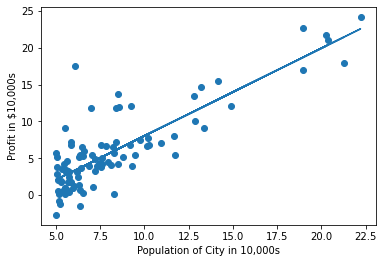

In [12]:
plt.scatter(X[:,1], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, theta))
plt.show()

<h3> Multiple LInear Regression

In [13]:
data = pd.read_csv('machine-learning-ex1/ex1/ex1data2.txt', header = None)
X = data.iloc[:,0:2]    # Read first two columns into X
y = data.iloc[:,2]      # Read the third column into y
m = len(y)              # No. of training samples
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [14]:
X = (X - np.mean(X))/np.std(X)   # Feature scaling (Z-score Normalization)

In [15]:
ones = np.ones((m,1))
X = np.hstack((ones, X))
alpha = 0.01
num_iters = 400
theta = np.zeros((3,1))
y = y[:,np.newaxis]

In [16]:
def computeMultiCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)

J = computeMultiCost(X, y, theta)
print(J)

65591548106.45744


In [17]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta

theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(theta)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


In [18]:
J = computeMultiCost(X, y, theta)
print(J)

2105448288.6292474
